Lista Final


In [10]:
import io, requests
import pandas as pd, matplotlib.pyplot as plt
from bs4 import BeautifulSoup


with io.StringIO() as csv:
  data_url \
    = "https://docs.google.com/uc?export=download&id=1GLngCo_qP1H_SfOjrGk6eaABciTLOSBU"
  data = requests.get(data_url).text
  csv.write(data)
  csv.seek(0)
  dataframe = pd.read_csv(csv)


pd.set_option('display.expand_frame_repr', False)

# Exibir o DataFrame
print(dataframe)

      Series_reference   Period  Data_value Suppressed STATUS   UNITS  Magnitude                         Subject                                         Group                          Series_title_1                      Series_title_2 Series_title_3  Series_title_4  Series_title_5
0          BDCQ.SEA1AA  2011.06     80078.0        NaN      F  Number          0  Business Data Collection - BDC               Industry by employment variable                             Filled jobs   Agriculture, Forestry and Fishing         Actual             NaN             NaN
1          BDCQ.SEA1AA  2011.09     78324.0        NaN      F  Number          0  Business Data Collection - BDC               Industry by employment variable                             Filled jobs   Agriculture, Forestry and Fishing         Actual             NaN             NaN
2          BDCQ.SEA1AA  2011.12     85850.0        NaN      F  Number          0  Business Data Collection - BDC               Industry by employment vari

# Questão 1

a)

In [11]:
#removendo a coluna 'Series_reference'
dataframe.drop(columns=['Series_reference'], inplace=True)

pd.set_option('display.expand_frame_repr', False)

print(dataframe)

        Period  Data_value Suppressed STATUS   UNITS  Magnitude                         Subject                                         Group                          Series_title_1                      Series_title_2 Series_title_3  Series_title_4  Series_title_5
0      2011.06     80078.0        NaN      F  Number          0  Business Data Collection - BDC               Industry by employment variable                             Filled jobs   Agriculture, Forestry and Fishing         Actual             NaN             NaN
1      2011.09     78324.0        NaN      F  Number          0  Business Data Collection - BDC               Industry by employment variable                             Filled jobs   Agriculture, Forestry and Fishing         Actual             NaN             NaN
2      2011.12     85850.0        NaN      F  Number          0  Business Data Collection - BDC               Industry by employment variable                             Filled jobs   Agriculture, Forestry

b)

In [12]:
#exibindo os tipos das colunas restantes
print(dataframe.dtypes)

Period            float64
Data_value        float64
Suppressed         object
STATUS             object
UNITS              object
Magnitude           int64
Subject            object
Group              object
Series_title_1     object
Series_title_2     object
Series_title_3     object
Series_title_4    float64
Series_title_5    float64
dtype: object


c)

In [13]:
#exibindo o número de entradas no DataFrame
num_entries = dataframe.shape[0]
print("Número de entradas no DataFrame:", num_entries)

Número de entradas no DataFrame: 20641


d)

In [14]:
#exibindo todos os diferentes períodos presentes na coluna 'Period'
unique_periods = dataframe['Period'].unique()
print("Diferentes períodos presentes no DataFrame:")
for period in unique_periods:
    print(period)

Diferentes períodos presentes no DataFrame:
2011.06
2011.09
2011.12
2012.03
2012.06
2012.09
2012.12
2013.03
2013.06
2013.09
2013.12
2014.03
2014.06
2014.09
2014.12
2015.03
2015.06
2015.09
2015.12
2016.03
2016.06
2016.09
2016.12
2017.03
2017.06
2017.09
2017.12
2018.03
2018.06
2018.09
2018.12
2019.03
2019.06
2019.09
2019.12
2020.03
2020.06
2020.09
2020.12
2021.03
2021.06
2021.09
2021.12
2022.03
2022.06
2022.09


e)

In [15]:
new_dataframe = dataframe[dataframe['Series_title_1'] == 'Total earnings']

print(new_dataframe)

        Period    Data_value Suppressed STATUS  UNITS  Magnitude                         Subject                                         Group  Series_title_1                      Series_title_2 Series_title_3  Series_title_4  Series_title_5
2760   2011.06    700.870910        NaN      F  Value          6  Business Data Collection - BDC               Industry by employment variable  Total earnings   Agriculture, Forestry and Fishing         Actual             NaN             NaN
2761   2011.09    708.377901        NaN      F  Value          6  Business Data Collection - BDC               Industry by employment variable  Total earnings   Agriculture, Forestry and Fishing         Actual             NaN             NaN
2762   2011.12    784.855823        NaN      F  Value          6  Business Data Collection - BDC               Industry by employment variable  Total earnings   Agriculture, Forestry and Fishing         Actual             NaN             NaN
2763   2012.03    789.940538    

f)

In [16]:
#agrupando os dados pelo tipo de Series_title_1 e calcular as somas dos Data_value
grouped = dataframe.groupby('Series_title_1')['Data_value'].sum()

#encontrando os períodos com os maiores valores para cada tipo de Series_title_1
for series_title, total_value in grouped.items():
    max_period_idx = dataframe[dataframe['Series_title_1'] == series_title]['Data_value'].idxmax()
    max_period = dataframe.loc[max_period_idx]['Period']
    print("Tipo:", series_title)
    print("Período com o maior valor:", max_period)
    print("Valor total:", total_value)
    print()


Tipo: Filled jobs
Período com o maior valor: 2022.09
Valor total: 809370168.0

Tipo: Filled jobs (workplace location based)
Período com o maior valor: 2022.09
Valor total: 179862151.0

Tipo: Total earnings
Período com o maior valor: 2022.09
Valor total: 7767326.921344



# Questão 2

In [17]:
filled_jobs_per_period_by_area = dataframe[(dataframe['Series_title_1'] == 'Filled jobs') & \
  (dataframe['Group'] == 'Industry by employment variable')]

filled_jobs_per_period_by_area \
   = filled_jobs_per_period_by_area[['Series_title_2', 'Period', 'Data_value']]


area_data_list = [d.sort_values('Period')\
                  .dropna(axis=0)\
                  .drop(['Series_title_2', 'Period'], axis=1)\
                  .values.tolist() for _, d in \
  filled_jobs_per_period_by_area.groupby(['Series_title_2'])]


area_data_list_final = []
for i, area_data in enumerate(area_data_list):
  area_data_list_final.append([0.0] * (int(len(area_data) / 2)))
  data_pairs = enumerate(zip(*[iter(area_data)]*2))
  for j, (month_start, month_end) in data_pairs:
    area_data_list_final[i][j] = month_end[0] - month_start[0]


area_labels_final = filled_jobs_per_period_by_area['Series_title_2'].unique()


x_axis = range(len(area_data_list_final[0]))
nlabels = len(area_labels_final)


<ipython-input-17-9934a804927f>:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  area_data_list = [d.sort_values('Period')\


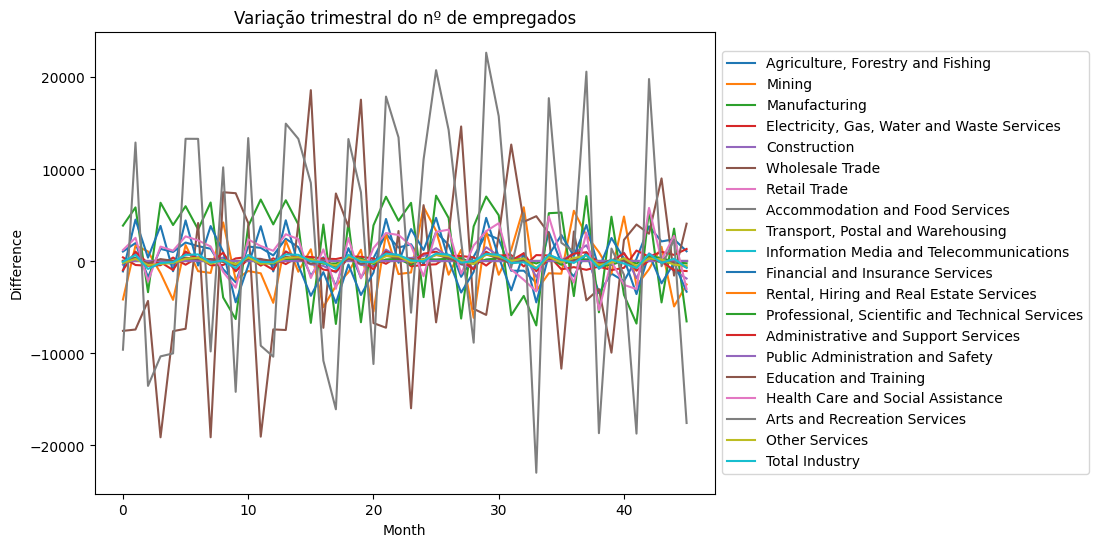

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

#plotando linhas para cada área
for i in range(nlabels):
    ax.plot(x_axis, area_data_list_final[i], label=area_labels_final[i])

#configurando rótulos dos eixos e título
ax.set_xlabel('Month')
ax.set_ylabel('Difference')
ax.set_title('Variação trimestral do nº de empregados')

#configurando a posição da legenda à direita
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


# Questão 3

In [19]:
import re
from retrying import retry

URL = "https://stackoverflow.com/questions?tab=active&pagesize=50"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.3"}


@retry(wait_fixed=3000, stop_max_attempt_number=3)
def fetch_page(url, headers):
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    return response.content


response_content = fetch_page(URL, headers)

soup = BeautifulSoup(response_content, 'html.parser')

#encontrando todos os resumos de perguntas
questions = soup.select(".s-post-summary")

data = []
print(len(questions))
for question in questions:
    soup = question
    title_element = soup.select_one('.s-post-summary--content-title a')
    title = title_element.get_text(strip=True)
    author_element = soup.select_one('.s-user-card--info .flex--item')
    author = author_element.get_text(strip=True)
    summary_element = soup.select_one('.s-post-summary--content-excerpt')
    summary = summary_element.get_text(strip=True)


    #extraindo pontuação de reputação, votos, respostas e visualizações usando expressões regulares
    reputation_score_element = soup.select_one('.s-user-card--rep span')
    reputation_score_match = re.search(
        r'\d+', reputation_score_element['title'])
    reputation_score = int(reputation_score_match.group()
                           ) if reputation_score_match else 0
    votes_element = soup.find(
        'div', class_='s-post-summary--stats-item__emphasized')
    if votes_element:
        if votes_element.span:
            votes = votes_element.span.text
        else:
            votes = 0
    else:
        votes = 0

    answers_element = soup.find('div', class_='s-post-summary--stats-item')
    if answers_element:
        if answers_element.span:
            answers = answers_element.span.text
        else:
            answers = 0
    else:
        answers = 0

    views_elements = soup.find_all('div', class_='s-post-summary--stats-item')
    if views_elements:
        if views_elements[-1].span:
            views = views_elements[-1].span.text
        else:
            views = 0
    else:
        views = 0
    data.append([title, author, summary,
                reputation_score, votes, answers, views])

#criando um dataframe
df = pd.DataFrame(data, columns=[
                  'title', 'author', 'summary', 'reputation_score', 'votes', 'answers', 'views'])
print(df)
df.to_csv("stackoverflow_data.csv", index=False)


50
                                                title                    author                                            summary  reputation_score  votes answers views
0   Memory protection keys: Exception handler cras...           Robert Kueffner  I am interested in inprocess isolation in x86/...                 0      0       0    21
1                      How to install Rjags on Linux?                     LW001  I am using my school's server, so I don't have...                 0      0       0     5
2   Cant Check Through All the Input Text Boxes fo...             Peter Seliger  Im not sure how to go about this to try and ch...                11      0       0    19
3   How to launch Nuke with docked panels by defau...                     CKane  I am trying to force docked control panels in ...                 0      0       0     3
4       Printf command adding extra space in the line       Diego Torres Milano  I am trying to create hdr record in unix scrip...                6

In [2]:
!pip install retrying